# Analysis of GUCCCC candidate motif

Modisco flagged GUCCCC as a possible motif. We see whether the presence of this motif has an impact in other datasets.

In [1]:
## Imports
# base python
from importlib import reload
import re
import itertools
import random
import os
from pathlib import Path
random.seed(1337)
import pickle
from decimal import Decimal
import collections

# numpy and similar
import numpy as np
np.random.seed(1337)
import pandas as pd
pd.options.mode.chained_assignment = None 
import scipy.stats as stats

# plotting
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import plotnine

In [2]:
with open(Path("../Data/data_dict.pkl"), 'rb') as handle:
    data_dict = pickle.load(handle)
for key in data_dict:
    print(key)
    print(len(data_dict[key]))

mpra
980244
snv
1584
ptr
11575
wilhelm
5293
andreev
8003
pcr3
7672
eichhorn
8956
doudna
25831
varlen_mpra
102214


# Random MPRA

In [3]:
mpra_df = data_dict["mpra"]

In [4]:
random_df = mpra_df.query('library == "egfp_unmod_1"')
random_df["count"] = random_df["utr"].str.count("GTCCCC")
random_df["count_cat"] = pd.Categorical(random_df["count"])

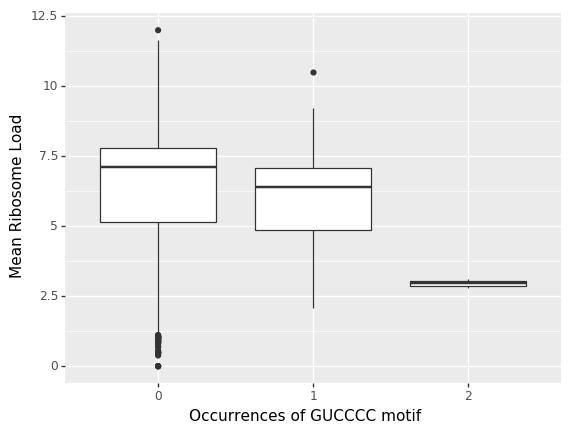

<ggplot: (2949558152547)>

In [5]:
p = (plotnine.ggplot(random_df, plotnine.aes('count_cat', 'rl'))
    + plotnine.geom_boxplot()
    + plotnine.labs(y = "Mean Ribosome Load", x = "Occurrences of GUCCCC motif"))
p

In [122]:
p.save("../Graphics/" + "gucccc_random" + ".svg", width=7.0, height=7.0*0.66)

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 7.0 x 4.62 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Graphics/gucccc_random.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [6]:
stats.ranksums(random_df.query('count == 0')["rl"], random_df.query('count > 0')["rl"])

RanksumsResult(statistic=18.794220586866437, pvalue=8.420814362651482e-79)

In [7]:
stats.ranksums(random_df.query('count == 0')["rl"], random_df.query('count == 1')["rl"])

RanksumsResult(statistic=18.72165432055117, pvalue=3.2974908070451094e-78)

In [8]:
stats.ranksums(random_df.query('count == 1')["rl"], random_df.query('count == 2')["rl"])

RanksumsResult(statistic=2.315024445294232, pvalue=0.020611594297396212)

# Human MPRA

In [10]:
human_df = mpra_df.query('library == "human"')
human_df["count"] = human_df["utr"].str.count("GTCCCC")
human_df["count_cat"] = pd.Categorical(human_df["count"])

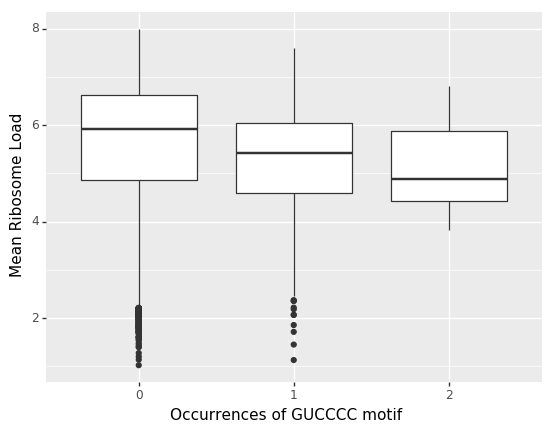

<ggplot: (2949475516813)>

In [11]:
p = (plotnine.ggplot(human_df, plotnine.aes('count_cat', 'rl'))
    + plotnine.geom_boxplot()
    + plotnine.labs(y = "Mean Ribosome Load", x = "Occurrences of GUCCCC motif"))
p

In [124]:
p.save("../Graphics/" + "gucccc_human" + ".svg", width=7.0, height=7.0*0.66)

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 7.0 x 4.62 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Graphics/gucccc_human.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [108]:
stats.ranksums(human_df.query('count == 0')["rl"], human_df.query('count > 0')["rl"])

RanksumsResult(statistic=10.275399475043038, pvalue=9.096679289310056e-25)

In [12]:
print(stats.ranksums(human_df.query('count == 0')["rl"], human_df.query('count == 1')["rl"]))
print(stats.ranksums(human_df.query('count == 1')["rl"], human_df.query('count == 2')["rl"]))
print(stats.ranksums(human_df.query('count == 0')["rl"], human_df.query('count == 2')["rl"]))

RanksumsResult(statistic=10.0355485953595, pvalue=1.0636647344352434e-23)
RanksumsResult(statistic=0.7618394764293829, pvalue=0.44615581622281353)
RanksumsResult(statistic=2.316266388965795, pvalue=0.020543728309989042)


# Varlen MPRA

In [13]:
varlen_df = data_dict["varlen_mpra"]
varlen_df["count"] = varlen_df["utr"].str.count("GTCCCC")
varlen_df["count_cat"] = pd.Categorical(varlen_df["count"])

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/stats/stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


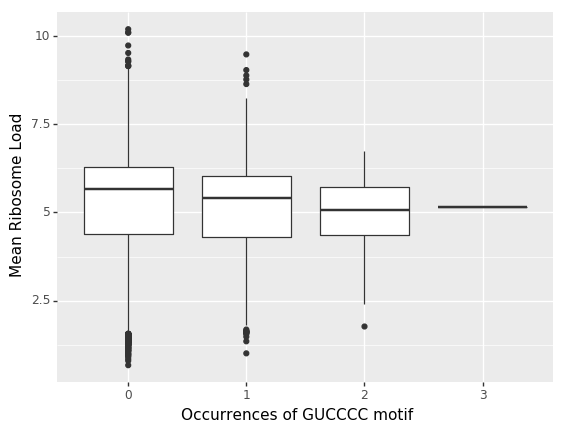

<ggplot: (1431525105079)>

In [14]:
p = (plotnine.ggplot(varlen_df, plotnine.aes('count_cat', 'rl'))
    + plotnine.geom_boxplot()
    + plotnine.labs(y = "Mean Ribosome Load", x = "Occurrences of GUCCCC motif"))
p

In [126]:
p.save("../Graphics/" + "gucccc_varlen" + ".svg", width=7.0, height=7.0*0.66)

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 7.0 x 4.62 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Graphics/gucccc_varlen.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/stats/stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


In [109]:
stats.ranksums(varlen_df.query('count == 0')["rl"], varlen_df.query('count > 0')["rl"])

RanksumsResult(statistic=8.23838905862983, pvalue=1.7454480548200912e-16)

In [15]:
print(stats.ranksums(varlen_df.query('count == 0')["rl"], varlen_df.query('count == 1')["rl"]))
print(stats.ranksums(varlen_df.query('count == 1')["rl"], varlen_df.query('count == 2')["rl"]))
print(stats.ranksums(varlen_df.query('count == 0')["rl"], varlen_df.query('count == 2')["rl"]))

RanksumsResult(statistic=7.866577442717093, pvalue=3.6447513593882436e-15)
RanksumsResult(statistic=1.5743142659571034, pvalue=0.11541481327356924)
RanksumsResult(statistic=2.9111431423408165, pvalue=0.003601090003679832)


## MPRA combined plot

In [9]:
random_df["MPRA_type"] = "random (50 nt)"
human_df["MPRA_type"] = "human (50 nt)"
varlen_df["MPRA_type"] = "variable length"
concat_mpra_df = pd.concat([random_df[["count", "rl", "MPRA_type"]], human_df[["count", "rl", "MPRA_type"]], varlen_df[["count", "rl", "MPRA_type"]]])

In [10]:
concat_mpra_df["count_cat"] = pd.Categorical(concat_mpra_df["count"])

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/stats/stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/utils.py:634: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(lst, axis=axis, ignore_index=True)


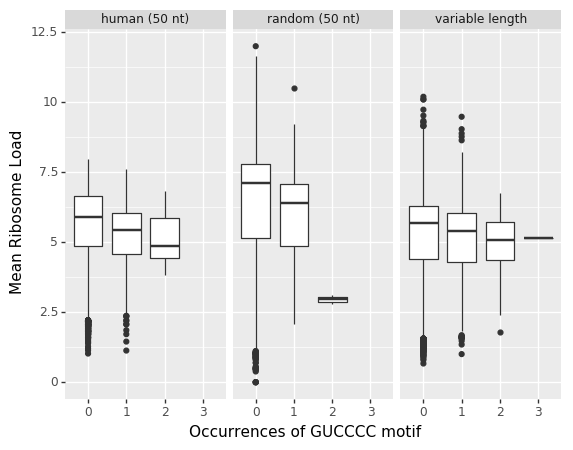

<ggplot: (-9223369072452032168)>

In [11]:
p = (plotnine.ggplot(concat_mpra_df, plotnine.aes('count_cat', 'rl'))
    + plotnine.geom_boxplot()
    + plotnine.labs(y = "Mean Ribosome Load", x = "Occurrences of GUCCCC motif")
    + plotnine.facet_wrap("MPRA_type"))
p

In [12]:
p.save("../Graphics/" + "gucccc_mpra_all" + ".svg", width=7.0, height=7.0*0.66)

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 7.0 x 4.62 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Graphics/gucccc_mpra_all.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/stats/stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/utils.py:634: FutureWarning: Sorting because non-concatenation ax

# Doudna

In [11]:
doudna_df = data_dict["doudna"]
doudna_df["count"] = doudna_df["utr"].str.count("GTCCCC")
doudna_df["count_cat"] = pd.Categorical(doudna_df["count"])

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/stats/stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


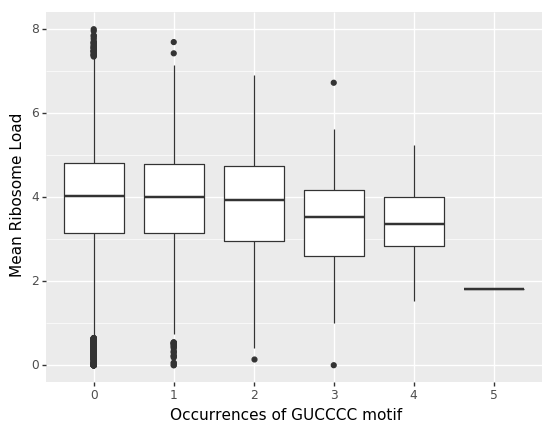

<ggplot: (-9223369085897495713)>

In [127]:
p = (plotnine.ggplot(doudna_df, plotnine.aes('count_cat', 'rl_mean'))
    + plotnine.geom_boxplot()
    + plotnine.labs(y = "Mean Ribosome Load", x = "Occurrences of GUCCCC motif"))
p

In [128]:
p.save("../Graphics/" + "gucccc_doudna" + ".svg", width=7.0, height=7.0*0.66)

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 7.0 x 4.62 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Graphics/gucccc_doudna.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/stats/stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


In [29]:
stats.ranksums(x = doudna_df.query('count == 0')["rl_mean"], y =  doudna_df.query('count > 0')["rl_mean"])

RanksumsResult(statistic=3.452462182043044, pvalue=0.0005554953380145717)

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/stats/stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


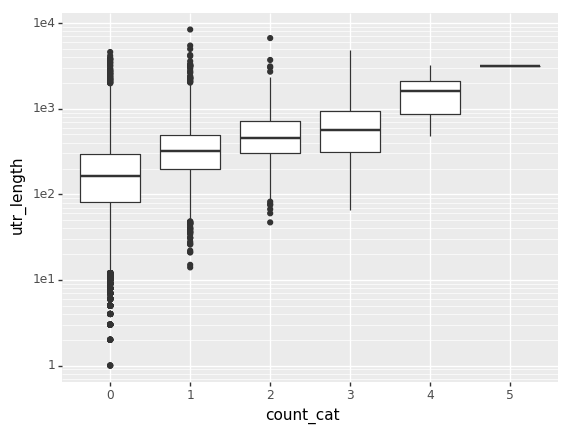

<ggplot: (-9223369085900140684)>

In [95]:
doudna_df["utr_length"] = doudna_df["utr"].str.len()
p = (plotnine.ggplot(doudna_df, plotnine.aes('count_cat', 'utr_length'))
    + plotnine.geom_boxplot()
    + plotnine.scale_y_log10())
p

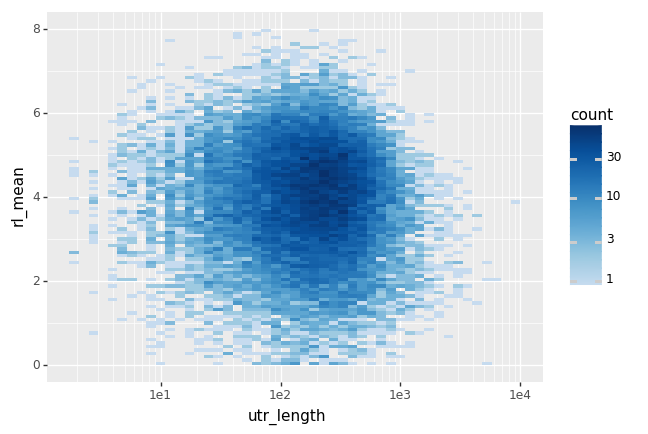

<ggplot: (-9223369085899938430)>

In [97]:
p = (plotnine.ggplot(doudna_df, plotnine.aes('utr_length', 'rl_mean'))
     + plotnine.geom_bin2d(binwidth = 0.08)
     + plotnine.scale_fill_continuous(ListedColormap(cm.get_cmap('Blues', 512)(np.linspace(0.25, 1, 384))), trans="log10")
     + plotnine.scale_x_log10())
p

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/stats/stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


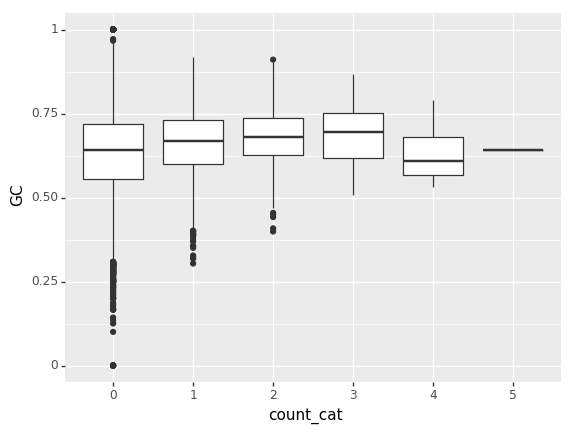

<ggplot: (2951000022185)>

In [60]:
doudna_df["GC"] = (doudna_df["utr"].str.count("G") + doudna_df["utr"].str.count("C"))/doudna_df["utr_length"]
p = (plotnine.ggplot(doudna_df, plotnine.aes('count_cat', 'GC'))
    + plotnine.geom_boxplot())
p

# Andreev

In [36]:
andreev_df = data_dict["andreev"]
andreev_df["count"] = andreev_df["utr"].str.count("GUCCCC")
andreev_df["count_cat"] = pd.Categorical(andreev_df["count"])

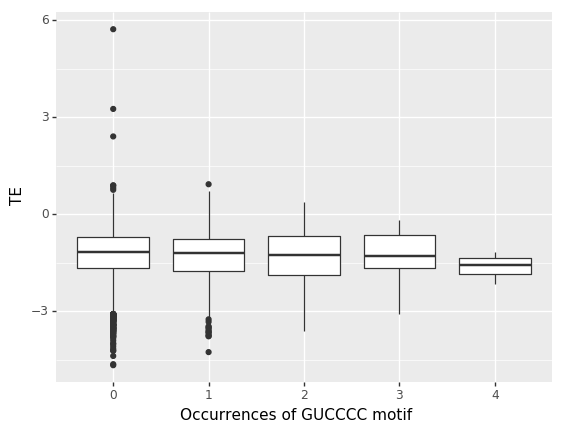

<ggplot: (-9223369085847030114)>

In [131]:
p = (plotnine.ggplot(andreev_df, plotnine.aes('count_cat', 'log_load'))
    + plotnine.geom_boxplot()
     + plotnine.labs(y = "TE", x = "Occurrences of GUCCCC motif"))
p

In [132]:
p.save("../Graphics/" + "gucccc_andreev" + ".svg", width=7.0, height=7.0*0.66)

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 7.0 x 4.62 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Graphics/gucccc_andreev.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [40]:
stats.ranksums(x = andreev_df.query('count == 0')["log_load"], y =  andreev_df.query('count > 0')["log_load"])

RanksumsResult(statistic=2.0717903635690864, pvalue=0.038284995756781286)

# Eichhorn

In [41]:
eichhorn_df = data_dict["eichhorn"]
eichhorn_df["count"] = eichhorn_df["utr"].str.count("GUCCCC")
eichhorn_df["count_cat"] = pd.Categorical(eichhorn_df["count"])

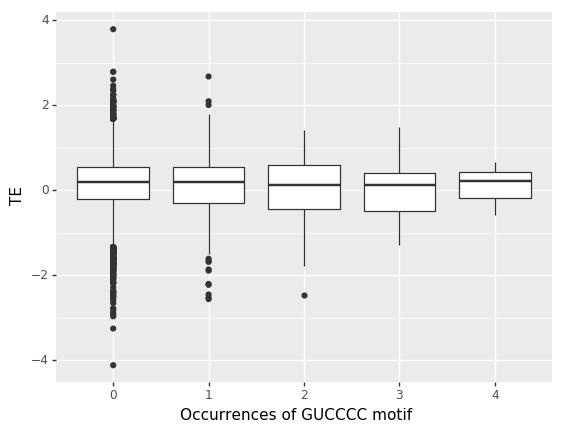

<ggplot: (-9223369085846970652)>

In [133]:
p = (plotnine.ggplot(eichhorn_df, plotnine.aes('count_cat', 'log_load'))
    + plotnine.geom_boxplot()
    + plotnine.labs(y = "TE", x = "Occurrences of GUCCCC motif"))
p

In [134]:
p.save("../Graphics/" + "gucccc_eichhorn" + ".svg", width=7.0, height=7.0*0.66)

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 7.0 x 4.62 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Graphics/gucccc_eichhorn.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [44]:
stats.ranksums(x = eichhorn_df.query('count == 0')["log_load"], y =  eichhorn_df.query('count > 0')["log_load"])

RanksumsResult(statistic=1.6225792006000461, pvalue=0.10467938976529331)

# Xiao

In [136]:
xiao_df = data_dict["pcr3"]
xiao_df["count"] = xiao_df["utr"].str.count("GUCCCC")
xiao_df["count_cat"] = pd.Categorical(xiao_df["count"])

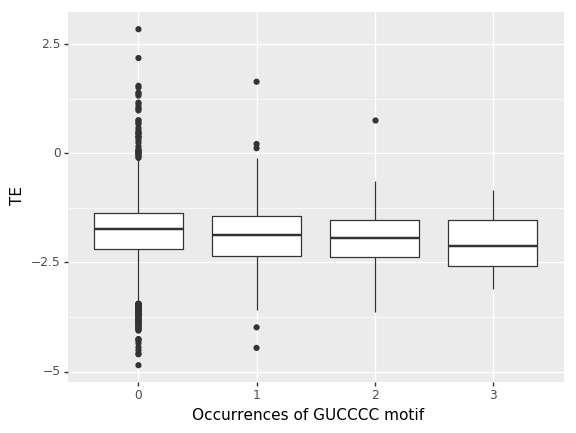

<ggplot: (-9223369085846967534)>

In [137]:
p = (plotnine.ggplot(xiao_df, plotnine.aes('count_cat', 'log_load'))
    + plotnine.geom_boxplot()
    + plotnine.labs(y = "TE", x = "Occurrences of GUCCCC motif"))
p

In [138]:
p.save("../Graphics/" + "gucccc_xiao" + ".svg", width=7.0, height=7.0*0.66)

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 7.0 x 4.62 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Graphics/gucccc_xiao.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [139]:
stats.ranksums(x = xiao_df.query('count == 0')["log_load"], y =  xiao_df.query('count > 0')["log_load"])

RanksumsResult(statistic=5.269948533002905, pvalue=1.3646201655224232e-07)

## Combined TE datasets plot

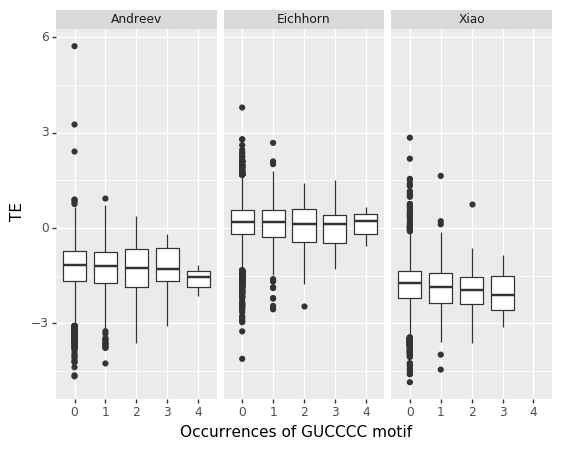

<ggplot: (1431524740984)>

In [20]:
xiao_df = data_dict["pcr3"]
xiao_df["count"] = xiao_df["utr"].str.count("GUCCCC")
xiao_df["dataset"] = "Xiao"
eichhorn_df = data_dict["eichhorn"]
eichhorn_df["count"] = eichhorn_df["utr"].str.count("GUCCCC")
eichhorn_df["dataset"] = "Eichhorn"
andreev_df = data_dict["andreev"]
andreev_df["count"] = andreev_df["utr"].str.count("GUCCCC")
andreev_df["dataset"] = "Andreev"
concat_te_df = pd.concat([andreev_df[["count", "log_load", "dataset"]], eichhorn_df[["count", "log_load", "dataset"]], xiao_df[["count", "log_load", "dataset"]]])
concat_te_df["count_cat"] = pd.Categorical(concat_te_df["count"])

p = (plotnine.ggplot(concat_te_df, plotnine.aes('count_cat', 'log_load'))
    + plotnine.geom_boxplot()
    + plotnine.labs(y = "TE", x = "Occurrences of GUCCCC motif")
    + plotnine.facet_wrap("dataset"))
p

In [21]:
p.save("../Graphics/" + "gucccc_te" + ".svg", width=7.0, height=7.0*0.66)

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 7.0 x 4.62 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Graphics/gucccc_te.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


# Eraslan

In [3]:
eraslan_df = data_dict["ptr"]
eraslan_df["count"] = eraslan_df["utr"].str.count("GUCCCC")
eraslan_df["count_cat"] = pd.Categorical(eraslan_df["count"])

In [5]:
eraslan_df.query('count > 2')["GeneName"]

1446     CAMK2N1
1818        CDX2
1826       CEBPD
2068      CLDN23
2219      COL5A1
2415       CSPG5
3501     FAM168A
3922      GABRB2
4066      GIGYF1
4230        GPC4
4425       HAUS8
5173      KIF21A
6648       NOP56
6957        PAF1
7260        PHF2
7752       PRKCQ
8265       REEP5
8587       RRAS2
8677       S1PR3
9685     ST3GAL2
10000       TCAP
10553     TRIM11
11065     VPS37A
11351    ZDHHC14
11509     ZNF629
Name: GeneName, dtype: object

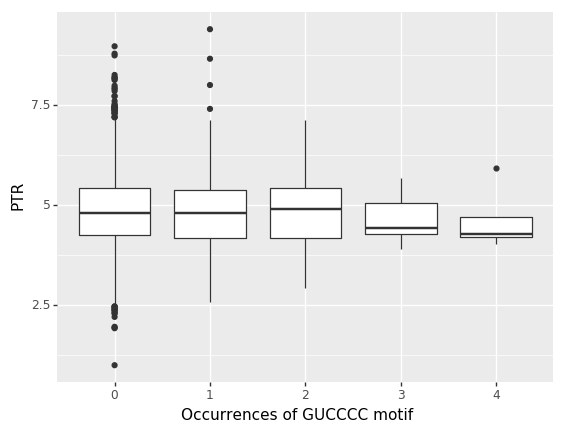

<ggplot: (2951014272348)>

In [140]:
p = (plotnine.ggplot(eraslan_df, plotnine.aes('count_cat', 'ptr'))
    + plotnine.geom_boxplot()
    + plotnine.labs(y = "PTR", x = "Occurrences of GUCCCC motif"))
p

In [141]:
p.save("../Graphics/" + "gucccc_eraslan" + ".svg", width=7.0, height=7.0*0.66)

/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 7.0 x 4.62 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/modules/i12g/anaconda/3-2018.12/envs/5utrclone/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Graphics/gucccc_eraslan.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [50]:
stats.ranksums(x = eraslan_df.query('count == 0')["ptr"], y =  eraslan_df.query('count > 0')["ptr"])

RanksumsResult(statistic=1.4619153112068393, pvalue=0.14376441867972722)

# Yeast MPRA

In [24]:
yeast_mpra = pd.read_csv("../Data/Random_UTRs.csv")

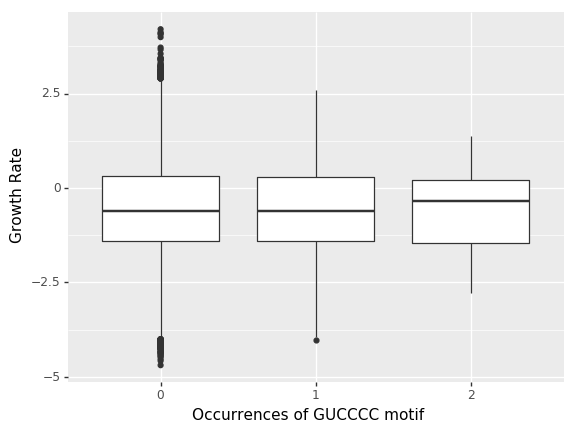

<ggplot: (-9223369087308373816)>

In [27]:
yeast_mpra["count"] = yeast_mpra["UTR"].str.count("GTCCCC")
yeast_mpra["count_cat"] = pd.Categorical(yeast_mpra["count"])

p = (plotnine.ggplot(yeast_mpra, plotnine.aes('count_cat', 'growth_rate'))
    + plotnine.geom_boxplot()
    + plotnine.labs(y = "Growth Rate", x = "Occurrences of GUCCCC motif"))
p

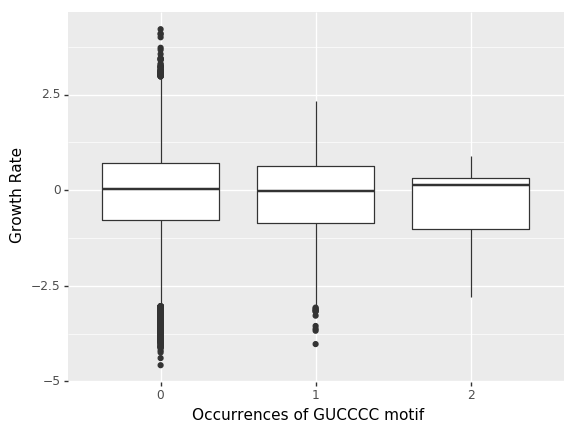

<ggplot: (-9223369087286665093)>

In [29]:
p = (plotnine.ggplot(yeast_mpra.loc[~yeast_mpra["UTR"].str.contains("ATG")], plotnine.aes('count_cat', 'growth_rate'))
    + plotnine.geom_boxplot()
    + plotnine.labs(y = "Growth Rate", x = "Occurrences of GUCCCC motif"))
p

In [30]:
yeast_native = pd.read_csv("../Data/Native_UTRs.csv")

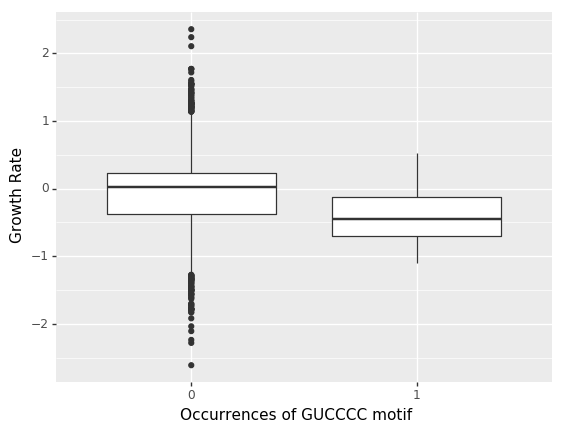

<ggplot: (-9223369087286643803)>

In [31]:
yeast_native["count"] = yeast_native["UTR"].str.count("GTCCCC")
yeast_native["count_cat"] = pd.Categorical(yeast_native["count"])

p = (plotnine.ggplot(yeast_native, plotnine.aes('count_cat', 'growth_rate'))
    + plotnine.geom_boxplot()
    + plotnine.labs(y = "Growth Rate", x = "Occurrences of GUCCCC motif"))
p

In [34]:
stats.ranksums(x = yeast_native.query('count == 0')["growth_rate"], y =  yeast_native.query('count > 0')["growth_rate"])

RanksumsResult(statistic=2.873705241132481, pvalue=0.004056873896273833)

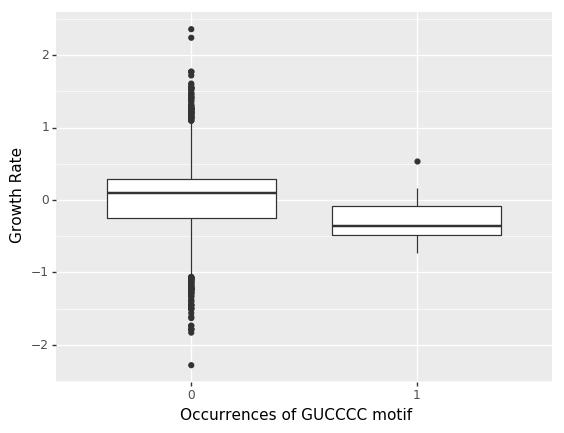

<ggplot: (2949568279567)>

In [32]:
p = (plotnine.ggplot(yeast_native.loc[~yeast_native["UTR"].str.contains("ATG")], plotnine.aes('count_cat', 'growth_rate'))
    + plotnine.geom_boxplot()
    + plotnine.labs(y = "Growth Rate", x = "Occurrences of GUCCCC motif"))
p

In [36]:
stats.ranksums(x = yeast_native.loc[~yeast_native["UTR"].str.contains("ATG")].query('count == 0')["growth_rate"], 
               y =  yeast_native.loc[~yeast_native["UTR"].str.contains("ATG")].query('count > 0')["growth_rate"])

RanksumsResult(statistic=2.5382166173151464, pvalue=0.011141899668018318)

In [37]:
yeast_segal = pd.read_csv("../Data/segal_yeast.csv")

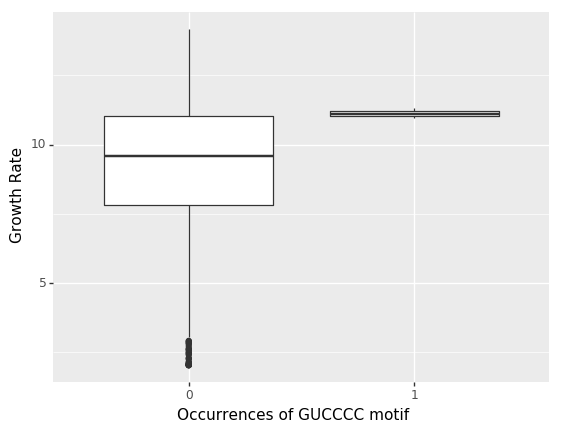

<ggplot: (2949568081500)>

In [39]:
yeast_segal = pd.read_csv("../Data/segal_yeast.csv")
yeast_segal["count"] = yeast_segal["sequence_variant"].str.count("GTCCCC")
yeast_segal["count_cat"] = pd.Categorical(yeast_segal["count"])

p = (plotnine.ggplot(yeast_segal, plotnine.aes('count_cat', 'mean_protein_abundance'))
    + plotnine.geom_boxplot()
    + plotnine.labs(y = "Growth Rate", x = "Occurrences of GUCCCC motif"))
p